# Part I - Ford GoBike System Dataset
## by Kolawole Riliwan

## Introduction

> This dataset is made up of information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area of California State, USA.


## Preliminary Wrangling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [3]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [4]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


197 users do not have their stations stated in this dataset while 8,265 users do not have their birth year and gender stated.

> The dataset is made up of 16 columns and 183412 rows. The dataset has 183412 entries for each column (including missing values). 7 columns of this dataset have float data type, 2 columns have int data type while the remaining 7 columns are of string data type.

> The main features of interest in this dataset are Bikes, duration of trips, user types, gender of users and lastly, stations.

> The features that will help support my investigation are start_station_name, end_station_name, duration_sec, user_type, member_birth_year, member_gender, bike_id and bike_share_for_all_trip columns will support my investigation into my features of interest.

## Data Cleaning

### Quality Issues:
- The following columns have the wrong data types: start_time, end_time, start_station_id, end_station_id, bike_id, member_birth_year.

- Missing values: There are missing values on 6 different columns. They are; start_station_id, end_station_id, start_station_name, end_station_name, member_birth_year and  member_gender.

### Tidiness Issues:
There is no noticeable data tidiness issue on this dataset. But then, since we do not have available data for each trip's distance, I would like to create columns for difference in latitude and longitude between start and end stations. These columns will be named "latitude_length" and "longitude_length". latitude_length will be the difference between end_station_latitude and start_station_latitude while longitude_length will be that of end_station_longitude and start_station_longitude. Later in our exploration, we would see if these differences in latitude and longitude determine how long the duration of trips will be.

### Solutions to data issues:
We are going to solve the given issues using the define-code-test framework. But first, we make a copy of the dataset so that all data cleaning activities will be done on the copy.

In [5]:
df_bike = df.copy()

## Issue 1

### Define:
The following columns have the wrong data types: start_time, end_time, start_station_id, end_station_id, bike_id, member_birth_year.

> The start_time and end_time columns should be in datetime data type and not string data type.

> The start_station_id and end_station_id columns should be in string data type and not float data type.

> The bike_id column should be in string data type and not int. We do not intend to do calculations with it.
 

> The data type of valid year entries on the member_birth_year column should be changed from float to int.

### Code:

In [6]:
# Let us change start_time and end_time to datetime.
df_bike['start_time'] = df_bike['start_time'].astype('datetime64')
df_bike['end_time'] = df_bike['end_time'].astype('datetime64')

# The next step is to change the data type of start_station_id and end_station_id from float to string.
df_bike['start_station_id'] = df_bike['start_station_id'].astype(str).replace('nan', np.nan)
df_bike['end_station_id'] = df_bike['end_station_id'].astype(str).replace('nan', np.nan)

# Let us change the bike_id from int to string.
df_bike['bike_id'] = df_bike['bike_id'].astype(str)

# Now, let us change the member_birth_year from float to int.
df_bike['member_birth_year'] = df_bike['member_birth_year'].replace(np.nan, 0)
df_bike['member_birth_year'] = df_bike['member_birth_year'].astype(int).replace(0, 'NaN')

### Test:

In [7]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null datetime64[ns]
end_time                   183412 non-null datetime64[ns]
start_station_id           183215 non-null object
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null object
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null object
user_type                  183412 non-null object
member_birth_year          183412 non-null object
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: datetime64[ns](2), float64(4), int64(1), object(9)
memory usag

## Issue 2

### Define:

Missing values are on 6 different columns namely; start_station_id, end_station_id, start_station_name, end_station_name, member_birth_year and  member_gender.

For this issue, we are not able to source for the missing values.
Since the missing values are very small when compared to the valid values, we leave the columns the way they are and work with the data we have.

### Formation of two new columns named latitude_length and longitude_length.

### Code:

In [8]:
df_bike['latitude_length'] = df_bike['end_station_latitude'] - df_bike['start_station_latitude']
df_bike['longitude_length'] = df_bike['end_station_longitude'] - df_bike['start_station_longitude']

### Test:

In [9]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 18 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null datetime64[ns]
end_time                   183412 non-null datetime64[ns]
start_station_id           183215 non-null object
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null object
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null object
user_type                  183412 non-null object
member_birth_year          183412 non-null object
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
latitude_length            183412 non-null float64
longitude_length   

## Univariate Exploration

### Question 1:

Display the distribution of duration across all trips.

### Visualization:

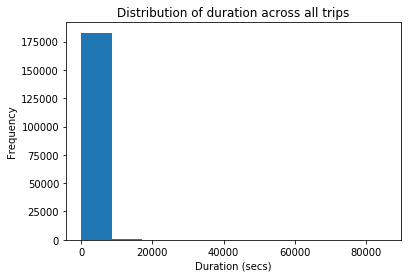

In [10]:
# We would be plotting few histograms in this project, so let us define a function for them.
def hist_plot(a,b,c,d,e,f):
    plt.hist(data = a, x = b, bins = c)
    plt.xlabel(d)
    plt.ylabel(e)
    plt.title(f);
hist_plot(df_bike,'duration_sec',10,'Duration (secs)','Frequency','Distribution of duration across all trips')

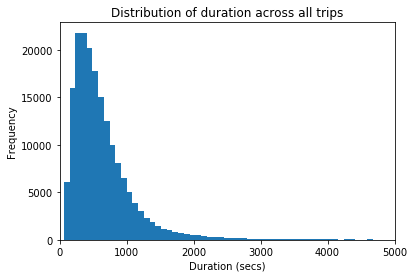

In [11]:
# Let us increase the bin size to 1000 and reduce the limit of x-axis to (0, 5000)
hist_plot(df_bike,'duration_sec',1000,'Duration (secs)','Frequency','Distribution of duration across all trips')
plt.xlim((0, 5000));

### Observations:
- The distribution is unimodal.
- The distribution is screwed to the right.
- The duration of majority of the trips fall below 2000 secs (less than 34 minutes). This implies that users of this bike-sharing system rarely go on long trips that take hours.

### Let us confirm something before moving to question 2 and 3.
> Confirm if the unique stations in the **start_station_name** column is equal to the unique stations in the **end_station_name** column. This will give us the assurance that all the stations in the **start_station_name** column are also represented in the **end_station_name** column and vice versa. This will also aid us in our next two questions. 

In [12]:
# Let us put all start stations in a list named start_station and all end stations in a list named end_stations.
start_station = []
end_station = []

# We now append all start station names into start_station and all end station names into end_station.
for i in range(len(df_bike['start_station_name'])):
    start = df_bike['start_station_name'][i]
    start_station.append(start)
    
for i in range(len(df_bike['end_station_name'])):
    end = df_bike['end_station_name'][i]
    end_station.append(end)
    
# To make the said confirmation, we do the following:
for i in start_station:
    if i not in end_station:
        print(i) # This must give us nothing (empty value) for the confirmation to be affirmative.

In [13]:
# Let us try the confirmation the other way round. We must also get nothing as the output here.
for i in end_station:
    if i not in start_station:
        print(i)

Both trials gave us nothing as output. This shows that, truly, the unique stations in the **start_station_name** column is equal to the unique stations in the **end_station_name** column. Now let's keep that in mind while dealing with question 2 and 3 of our Exploration.

### Question 2:
Display the distribution of latitude across all stations.

### Visualization:

Since, we have confirmed that the unique stations in the **start_station_name** column is equal to the unique stations in the **end_station_name** column, we can use either **start_station** or **end_station** to represent all the stations in this dataset.

Note: This confirmed assertion applies for **start** and **end** station_id, station_latitude and station_longitude. This is because every station has a unique name, id, latitude and longitude.

In [14]:
# For the visualization, we filter the dataframe df_bike to drop duplicate station names.
df_station = df_bike.drop_duplicates(subset='start_station_name')

# The length of this dataframe indicates the number of stations in the Ford GoBike dataset.
len(df_station)

330

There are 330 stations in the Ford GoBike dataset.
Let us now go ahead with the answer to our question.

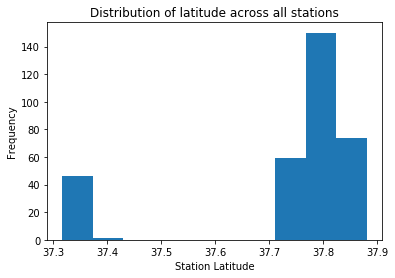

In [15]:
hist_plot(df_station, 'start_station_latitude', 10, 'Station Latitude', 'Frequency', 'Distribution of latitude across all stations')

### Observations:
- The distribution shows that all the stations have positive latitude values. This means, the latitudes are north of the equator. Hence, we say, San Francisco Bay area is in the Northern Hemisphere.
- The distribution is unimodal.

### Question 3:
Display the distribution of longitude across all stations.

### Visualization:

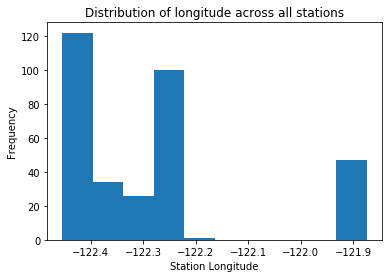

In [16]:
hist_plot(df_station, 'end_station_longitude', 10, 'Station Longitude', 'Frequency', 'Distribution of longitude across all stations')

### Observations:

- The distribution shows that all the stations have negative longitude values. This means, the longitudes are west of the prime meridian.
- The distribution is bimodal as it has two peaks.

### Question 4:
Gender of members.

### Visualization:

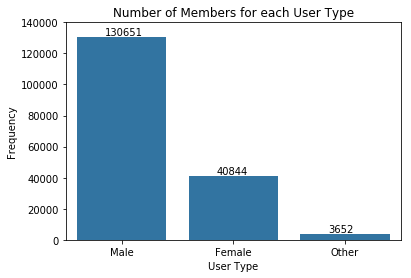

In [17]:
gender = ['Male', 'Female', 'Other']
gender_type = pd.api.types.CategoricalDtype(ordered=True, categories=gender)
df_bike['member_gender'] = df_bike['member_gender'].astype(gender_type)
sb.countplot(data = df_bike, x = 'member_gender', color = sb.color_palette()[0])
plt.xlabel('User Type')
plt.ylabel('Frequency')
plt.title('Number of Members for each User Type')
plt.ylim((0,140000));

# Let us add value labels.
gender_count = df_bike['member_gender'].value_counts()
for i in range(gender_count.shape[0]):
    count = gender_count[i]
    count_string = '{}'.format(count)  
    plt.text(i-0.15, count, count_string, va='bottom')

### Observations:
- Majority of the members are male.
- Asides male and female members, there are also members whose gender is **"other"**. This may constitute LGBTQ+.

### Question 5:
Number of Members for each User Type.

### Visualization:

In [18]:
# Let us derive the value counts of the user_type and then plot a pie chart for it.
user_type = df_bike['user_type'].value_counts()
user_type

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

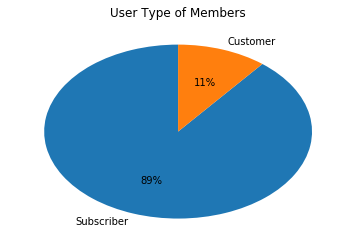

In [19]:
# I want to define a function for the pie chart so as to reduce repetition of codes.
def pie(varb, tit):
    plt.pie(varb, labels=varb.index, startangle = 90, autopct = '%0.0f%%')
    plt.title(tit);
    
pie(user_type, 'User Type of Members')

### Observations:
- There are more subscribers than customers.
- Subscribers account for 89% of the user types while customers account for 11% of them.

### Question 6:
For the user_type **"Customers"**, how many members does each gender have?

### Visualization:

In [20]:
# Firstly, we filter the dataframe df_bike such that user_type will be Customers only.
# Then we derive the value counts of the customers' gender.
df_cust = df_bike[df_bike['user_type'] == 'Customer']
cust_gend = df_cust['member_gender'].value_counts()
cust_gend

Male      11529
Female     4647
Other       455
Name: member_gender, dtype: int64

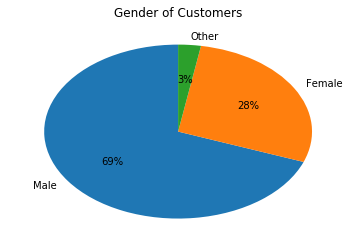

In [21]:
# Let us plot a pie chart for this.
pie(cust_gend, 'Gender of Customers')

### Observations:
- Majority (69%) of the customers who have not subscribed to the bike_sharing system are male.
- Also, 28% of such customers are females while the remaining 3% comprises of people with the gender **"other"**.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The countplot in question 4 shows there are members whose gender is **"other"**. It was unusual to me as I expected to see only males and females. In the end, I concluded **"other"** means **"LGBTQ+"** as the plot needed no transformation.

> I also found from the exploration that 89% of the users are subscribers. That was impressive as it shows that almost all the users have subscribed to the Ford GoBike system and they are not just mere customers.

> Before I could show the distributions of latitude and longitude across all stations, I had to drop duplicate station_name rows in the df_bike dataframe so that I will have unique stations only.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- When I plotted a histogram to show the distribution of duration across all trips, the plot was not informative as the outliers were way higher (in size) than majority of the values. The average duration value is 726secs while the maximum duration value is 85444secs. I increased the bins size and also reduced the limit of the x-axis so that the histogram will show properly, the part where the distribution is at its peak.


- When I plotted a countplot to show the gender of members, the x-axis was arranged in the order **Male-Other-Female**. I wanted the order to be **Male-Female-Other**. Due to this, I changed the data type of member gender to categorical using [Male, Female, Other] so that the x-axis will be in my preferred order.

## Bivariate Exploration


### Question 7:
How many bikes were used in this bike-sharing system? Which bikes were mostly used (based on number of times used)? Plot a bar chart to show the ten most used of bikes. 

### Visualization:

In [22]:
# Let us deduce the number of unique bikes using the dataframe df_bike.
len(df_bike['bike_id'].unique())

4646

There are 4646 different bikes in this bike-sharing system.

In [23]:
# For the ten most used bikes, we first create a table to show the top ten bikes used and how many times they were used.
bike = df_bike['bike_id'].value_counts()
bikes = bike[:10]
bikes = pd.DataFrame(bikes.reset_index()).rename(columns={'bike_id':'number_of_times_used','index':'bike_id'})
bikes['bike_id'] = bikes['bike_id'].astype('str')
bikes['bike'] = 'bike_'+bikes['bike_id']
bikes

,bike_id,number_of_times_used,bike
0,4794,191,bike_4794
1,4814,176,bike_4814
2,5014,174,bike_5014
3,4422,174,bike_4422
4,5145,173,bike_5145
5,5175,173,bike_5175
6,4450,172,bike_4450
7,5482,171,bike_5482
8,4773,170,bike_4773
9,5274,170,bike_5274


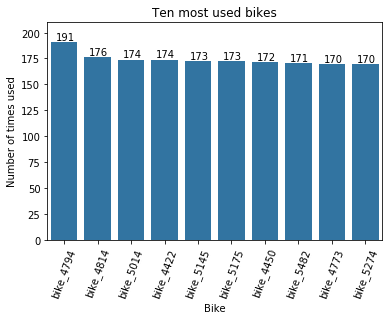

In [24]:
# Now we can plot a bar chart to show bike usage.
def station(a,b,c,d,e,f):
    sb.barplot(x=a, y=b, data=c, color = sb.color_palette()[0])
    plt.xlabel(d)
    plt.ylabel(e)
    plt.title(f);
station('bike','number_of_times_used',bikes,'Bike','Number of times used', 'Ten most used bikes')
plt.xticks(rotation=70)
plt.ylim((0, 210));

for i in range(len(bikes)):
    count = bikes['number_of_times_used'][i]
    count_string = '{}'.format(count)  
    plt.text(i-0.25, count, count_string, va='bottom')

### Observations:
- The bike with the ID 4794 was the most used bike. It was used 191 different times.
- The nine other bikes were used for almost the same amount of times (Between 170 and 176 times).

### Question 8:
Which bikes were mostly used (based on total duration accumulated)? Plot a bar chart to show the ten most used of bikes.

### Visualization:

In [25]:
# To do this, we first create a table to show the top ten bikes and their respective accumulated duration.
bike_dur = df_bike.groupby('bike_id')['duration_sec'].sum().reset_index()
#bike_dur = pd.DataFrame('bike_dur', columns=['bike_id'])
bike_dur = bike_dur.sort_values(by=['duration_sec'], ascending=False).reset_index().drop('index',axis=1)
bike_duration = bike_dur[:10]
bike_duration['bike_id'] = bike_duration['bike_id'].astype('str')
bike_duration['bike'] = 'bike_' + bike_duration['bike_id']
bike_duration

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,bike_id,duration_sec,bike
0,5481,217614,bike_5481
1,5282,203971,bike_5282
2,5561,189098,bike_5561
3,4964,183535,bike_4964
4,5373,180109,bike_5373
5,4714,173508,bike_4714
6,4728,168833,bike_4728
7,4637,166040,bike_4637
8,5048,159777,bike_5048
9,6235,159720,bike_6235


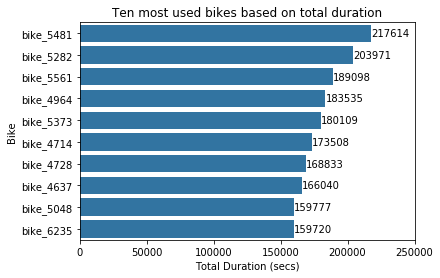

In [26]:
# We can now plot a bar chart with the table.
station('duration_sec','bike',bike_duration,'Total Duration (secs)','Bike','Ten most used bikes based on total duration')
plt.xlim((0, 250000));
def label(a,b):
    for i in range(len(a)):
        count = a[b][i]
        count_string = '{}'.format(count)
        plt.text(count+1, i, count_string, va='center')
label(bike_duration,'duration_sec')

### Observations:
- The bike with the ID 5481 accumulated the highest duration. It was on the road for 217,614 seconds.
- The visuals in Question 9 and Question 10 show that, the number of users that use a bike doesn't define the total duration the bike will spend on the road. None of the ten most used bikes (based on number of times used) made the top ten bikes (based on total duration accumulated).

### Question 9:
Top eleven stations with the highest number of departures. That is, the top eleven stations based on the number of times they appear on the column **start_station_name**.

### Visualization:

In [27]:
# We first create a dataframe that shows the top eleven stations and their number of departures. Then we create the visual.
top_st = df_bike['start_station_name'].value_counts()
top_start = top_st[:11]
top_start = pd.DataFrame(top_start.reset_index()).rename(columns={'start_station_name':'no_of_departures','index':'start_station_name'})
top_start

,start_station_name,no_of_departures
0,Market St at 10th St,3904
1,San Francisco Caltrain Station 2 (Townsend St...,3544
2,Berry St at 4th St,3052
3,Montgomery St BART Station (Market St at 2nd St),2895
4,Powell St BART Station (Market St at 4th St),2760
5,San Francisco Ferry Building (Harry Bridges Pl...,2710
6,San Francisco Caltrain (Townsend St at 4th St),2703
7,Powell St BART Station (Market St at 5th St),2327
8,Howard St at Beale St,2293
9,Steuart St at Market St,2283


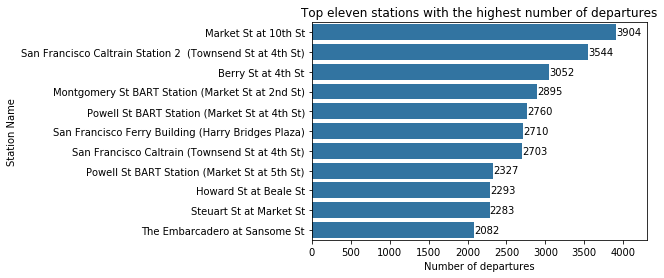

In [28]:
# Now that we have the dataframe, let us create the visual.
station('no_of_departures','start_station_name',top_start,'Number of departures','Station Name','Top eleven stations with the highest number of departures')
plt.xlim((0,4300))
label(top_start, 'no_of_departures')

### Observations:
- The station with the highest number of departures is **Market St at 10th St** and its number of departures is 3904.
- Only 3 stations achieved more than 3000 departures.

### Question 10:
Top eleven stations with the highest number of arrivals. That is, the top eleven stations based on the number of times they appear on the column end_station_name

### Visualization:

In [29]:
# We first create a dataframe that shows the top eleven stations and their number of departures. Then we create the visual.
top_en = df_bike['end_station_name'].value_counts()
top_end = top_en[:11]
top_end = pd.DataFrame(top_end.reset_index()).rename(columns={'end_station_name':'no_of_arrivals','index':'end_station_name'})
top_end

,end_station_name,no_of_arrivals
0,San Francisco Caltrain Station 2 (Townsend St...,4857
1,Market St at 10th St,3973
2,Montgomery St BART Station (Market St at 2nd St),3647
3,San Francisco Ferry Building (Harry Bridges Pl...,3368
4,Powell St BART Station (Market St at 4th St),2997
5,San Francisco Caltrain (Townsend St at 4th St),2947
6,Berry St at 4th St,2872
7,The Embarcadero at Sansome St,2512
8,Powell St BART Station (Market St at 5th St),2353
9,Steuart St at Market St,2338


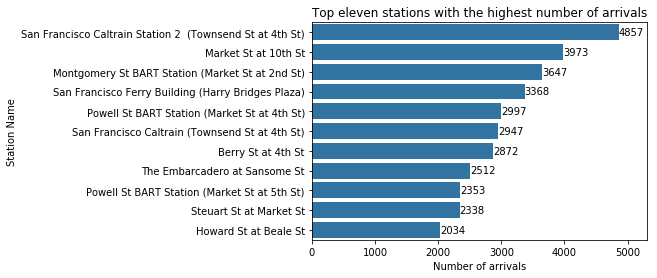

In [30]:
# Now that we have the dataframe, let us create the visual.
station('no_of_arrivals','end_station_name',top_end,'Number of arrivals','Station Name','Top eleven stations with the highest number of arrivals')
plt.xlim((0,5300))
label(top_end, 'no_of_arrivals')

### Observations:
- The station with the highest number of arrivals is **San Francisco Caltrain Station 2 (Townsend 4th St)** and its number of arrivals is 4857.
- The top eleven stations (based on number of departures) are also the top eleven stations (based on number of arrivals).

### Question 11:
Create a violin plot that shows the relationship between duration and each member gender. 

### Visualization:

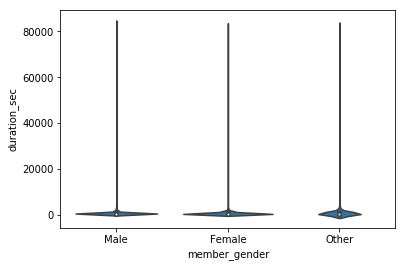

In [31]:
sb.violinplot(data=df_bike, x='member_gender', y='duration_sec', color=sb.color_palette()[0]);

Apparently, the outliers in this plot are way higher than the other values. Let us limit the y axis so that we can see the distribution for each gender clearly.

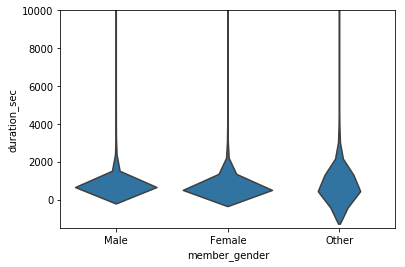

In [32]:
sb.violinplot(data=df_bike, x='member_gender', y='duration_sec', inner=None, color=sb.color_palette()[0])
plt.ylim((-1500, 10000));

### Observations:
- There are outliers in each category's distribution.
- The distribution of male users and that of female users are identical with the distribution of female users being broader.
- The distribution for each category has its peak at almost the same point. We can say that, the average duration of a male user's trip is almost the same as that of a female user and that of a user from the gender **"other".**

### Question 12:
Create a box plot that shows the relationship between duration and each user type.

### Visualization:

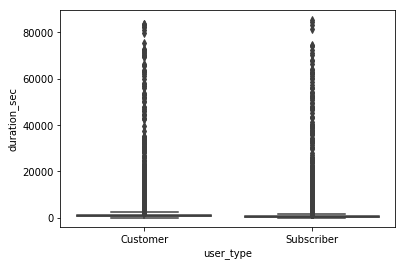

In [33]:
sb.boxplot(data=df_bike, x='user_type', y='duration_sec');

The outliers in this plot are way higher than the other values. Let us limit the y axis so that we can see the distribution for each user type clearly.

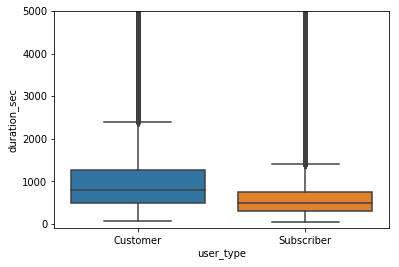

In [34]:
sb.boxplot(data=df_bike, x='user_type', y='duration_sec')
plt.ylim((-100,5000));

### Observations:
- On the average, the duration of a customer's trip is higher than that of a subscriber's trip.
- The boxplot also shows that the interquartile range of the customer duration is higher than that of subscriber duration.

### Columns latitude_length and longitude_length.
> Two extra columns were created during our data cleaning activities and they are; "latitude_length" and "longitude_length". This was done for us to have the difference in latitudes and longitudes between start and end stations. Let us inquire further, to see if these differences (named latitude_length and longitude_length) have any relationship with the duration of each trip.
- We will be taking monotonic relationships into consideration here. That is, whether the duration goes up/down as the difference in latitude/longitude go up/down. 

### Question 13:
Is there a monotonic relationship between latitude length and duration? Justify your answer with a seaborn regplot. 

### Visualization

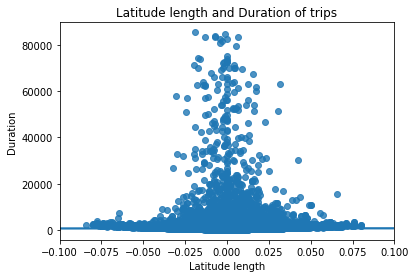

In [35]:
sb.regplot(x='latitude_length', y='duration_sec', data=df_bike)
plt.xlabel('Latitude length')
plt.ylabel('Duration')
plt.title('Latitude length and Duration of trips')
plt.xlim((-0.1,0.1));

### Observations:
- The scatter plot shows that there is no monotonic relationship between latitude length and duration of trips.

### Question 14:
Is there a monotonic relationship between longitude length and duration? Justify your answer with a matplotlib scatterplot. 

### Visualization

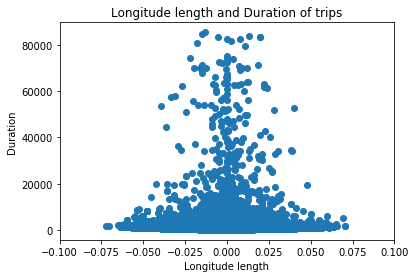

In [36]:
plt.scatter(x='longitude_length', y='duration_sec', data=df_bike)
plt.xlabel('Longitude length')
plt.ylabel('Duration')
plt.title('Longitude length and Duration of trips')
plt.xlim((-0.1,0.1));

### Observations:
- The scatter plot shows that there is no monotonic relationship between longitude length and duration of trips.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- There was something noticeable when I plotted a bar chart each for "the accumulated usage duration of bikes" and "the number of times the bikes were used". The bikes that accumulated the highest duration were not the bikes with the highest number of users. Infact, none of the top ten bikes in one category was found in the top ten bikes in the second category.

- Something noticeable also ocurred when I plotted an horizontal bar chart each for "the bikes with the highest number of departures" and "the bikes with the highest number of arrivals". The top eleven stations (based on number of departures) are also the top eleven stations (based on number of arrivals). This brings up the thought that stations with high number of departures will have high number of arrivals.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Yes. I noticed none of latitude_length and longitude_length has a monotonic relationship with duration of trips. High/low latitude_length do not signify high/low trip duration. Also, high/low longitude_length do not signify high/low trip duration.

## Multivariate Exploration


### Question 15:
From the visuals in the answers to Question 9 and Question 10, we noticed that the top eleven stations (based on number of departures) are also the top eleven stations (based on number of arrivals). Dig further to find the relationship between arrivals and departures.

### Visualization:

In [37]:
# Let us create a dataframe that has station names, number of departures and number of arrivals.
# To do this, we first create a dataframe that shows the top eleven stations and their number of departures;
start = top_start.sort_values(by = ['start_station_name']).reset_index().drop('index', axis=1)

# Then we create a dataframe that shows the top eleven stations and their number of arrivals.
end = top_end.sort_values(by = ['end_station_name']).reset_index().drop('index', axis=1)

# Note: We sorted both tables by the station name so that we won't have different start_station_name and end_station_name entries for each row after joining both tables.
# Lastly, we join both tables to achieve our aim.
start_end = pd.merge(start, end, left_index=True, right_index=True)
start_end

,start_station_name,no_of_departures,end_station_name,no_of_arrivals
0,Berry St at 4th St,3052,Berry St at 4th St,2872
1,Howard St at Beale St,2293,Howard St at Beale St,2034
2,Market St at 10th St,3904,Market St at 10th St,3973
3,Montgomery St BART Station (Market St at 2nd St),2895,Montgomery St BART Station (Market St at 2nd St),3647
4,Powell St BART Station (Market St at 4th St),2760,Powell St BART Station (Market St at 4th St),2997
5,Powell St BART Station (Market St at 5th St),2327,Powell St BART Station (Market St at 5th St),2353
6,San Francisco Caltrain (Townsend St at 4th St),2703,San Francisco Caltrain (Townsend St at 4th St),2947
7,San Francisco Caltrain Station 2 (Townsend St...,3544,San Francisco Caltrain Station 2 (Townsend St...,4857
8,San Francisco Ferry Building (Harry Bridges Pl...,2710,San Francisco Ferry Building (Harry Bridges Pl...,3368
9,Steuart St at Market St,2283,Steuart St at Market St,2338


Since the start_station_name and end_station_name have the same values for each row of the dataframe, let us drop one of them and rename the other one as **station_name**.

In [38]:
# Let us drop one of start_station_name and end_station_name and then rename the other as station_name.
start_end = start_end.rename(columns={'start_station_name':'station_name'}).drop('end_station_name', axis=1)
start_end

,station_name,no_of_departures,no_of_arrivals
0,Berry St at 4th St,3052,2872
1,Howard St at Beale St,2293,2034
2,Market St at 10th St,3904,3973
3,Montgomery St BART Station (Market St at 2nd St),2895,3647
4,Powell St BART Station (Market St at 4th St),2760,2997
5,Powell St BART Station (Market St at 5th St),2327,2353
6,San Francisco Caltrain (Townsend St at 4th St),2703,2947
7,San Francisco Caltrain Station 2 (Townsend St...,3544,4857
8,San Francisco Ferry Building (Harry Bridges Pl...,2710,3368
9,Steuart St at Market St,2283,2338


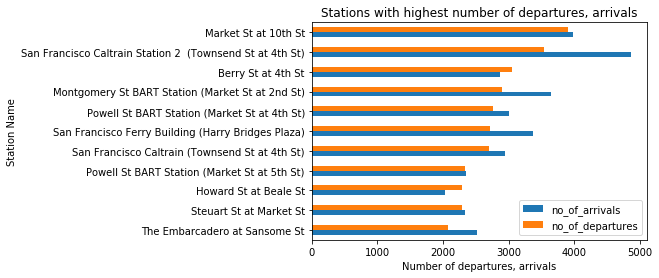

In [39]:
# Let us plot a horizontal clustered bar chart for the table **start_end**
start_end.sort_values(by=['no_of_departures'], inplace=True)
start_end.plot.barh(x='station_name', y=['no_of_arrivals','no_of_departures'])
plt.xlabel('Number of departures, arrivals')
plt.ylabel('Station Name')
plt.title('Stations with highest number of departures, arrivals');

### Observations:
Even though the top eleven stations (based on number of departures) are also the top eleven stations (based on number of arrivals), this clustered bar chart shows that, it is not enough to say "**the higher the number of departures from a station**, **the higher the number of arrivals on that station**". This is because, the highest station (based on number of departures) is not the highest (based on number of arrivals) and also, the least station (based on number of departures) is not the least (based on number of arrivals).

### Question 16:
Produce a box plot using member gender, user type and duration.

### Visualization:

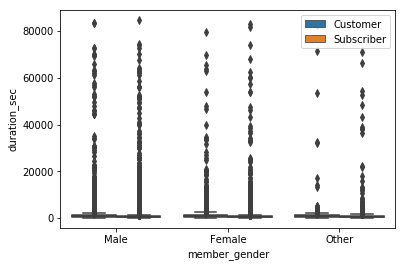

In [40]:
sb.boxplot(x='member_gender',y='duration_sec', hue='user_type', data = df_bike)
plt.legend(loc='upper right');

Let us limit the y axis so that we can see the distributions in the plot clearly.

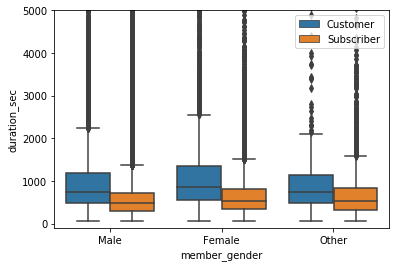

In [41]:
sb.boxplot(x='member_gender',y='duration_sec', hue='user_type', data = df_bike)
plt.ylim((-100,5000))
plt.legend(loc='upper right');

### Observations:
- For each gender, the average duration of a customer's trip is higher than that of a subscriber's trip.
- Also, for each gender, the minimum duration of a customer's trip is higher than that of a subscriber's trip.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I was able to relate member gender and user type to trip durations using a box plot. I noticed for each gender, the interquartile range of the duration of "customer trips" is higher than that of "subscriber trips". The boxplot also butressed the observation made in Question 1 that says "the duration of majority of the trips fall below 2000secs (34 minutes). 

### Were there any interesting or surprising interactions between features?

> Yes. At first, I was surprised that the average duration of a customer's trip is higher than that of a subscriber's trip, given that we have so many subscribers than consumers. But after some research, I found out on most occasions, the higher the sample size, the lower the average. As such, the consumers have a higher average duration than the subscribers.

## Conclusions
- There are 330 stations in the this bike-sharing system.
- There are 4646 different bikes in this bike-sharing system.
- In this bike sharing system, there are more male users than female users.
- In this bike sharing system, there are more subscribers than customers.
- Majority of the trip take less than 2000 seconds.
- If a bike is used by more users than other bikes, it doesn't mean the bike will accumulate more usage duration that the other bikes.